In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx
from itertools import combinations
plt.style.use('ggplot')

In [27]:
V=75 # Set of Nodes

In [28]:
c=5 # constant
alpha=2 # alpha value for type 2 calculation
dim=2 # dimension for type 2 calculation

In [29]:
# Node Positions
Max1=100
x=[random.randint(0,Max1) for i in range (V)]
y=[random.randint(0,Max1) for i in range (V)]
print("The values of x are:",x)
print("The values of y are:",y)

The values of x are: [38, 26, 87, 65, 93, 58, 4, 59, 39, 54, 80, 22, 53, 41, 81, 49, 94, 38, 97, 15, 96, 83, 20, 17, 62, 14, 14, 30, 31, 43, 36, 37, 73, 28, 86, 98, 4, 26, 31, 95, 74, 28, 44, 12, 23, 31, 70, 100, 95, 50, 47, 21, 100, 6, 68, 35, 58, 70, 75, 60, 99, 0, 91, 85, 50, 6, 77, 60, 44, 38, 2, 93, 85, 21, 24]
The values of y are: [81, 56, 21, 65, 10, 11, 100, 15, 25, 93, 41, 71, 13, 42, 94, 27, 67, 44, 56, 73, 31, 98, 18, 89, 69, 55, 4, 27, 45, 83, 66, 13, 34, 60, 49, 57, 81, 17, 27, 15, 73, 59, 8, 85, 3, 50, 77, 50, 52, 76, 87, 18, 21, 25, 7, 82, 61, 84, 6, 48, 16, 86, 64, 46, 33, 44, 12, 37, 30, 72, 16, 24, 17, 47, 76]


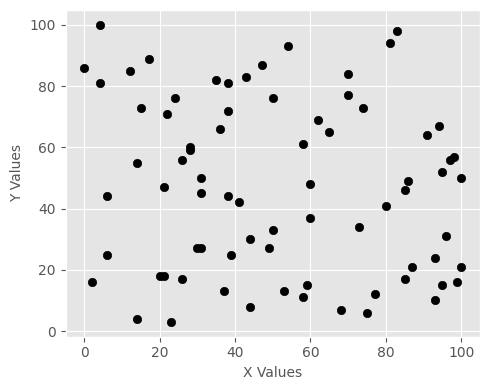

In [30]:
plt.figure(figsize=(5,4))
plt.scatter(x, y, color='black')
plt.xlabel('X Values', fontsize=10)
plt.ylabel('Y Values', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

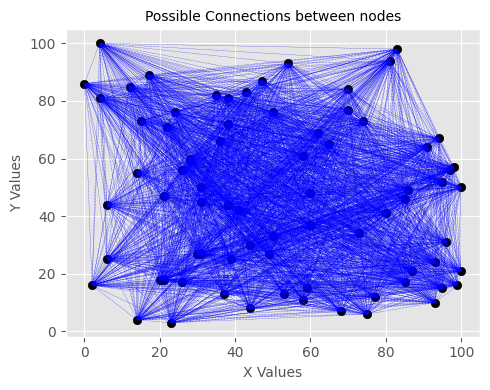

In [31]:
plt.figure(figsize=(5,4))
plt.scatter(x, y, color='black')
for (x1, y1), (x2, y2) in combinations(zip(x, y), 2):
    plt.plot([x1, x2], [y1, y2], 'b--', linewidth='0.2')
plt.xlabel('X Values', fontsize=10)
plt.ylabel('Y Values', fontsize=10)
plt.title("Possible Connections between nodes", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

the weights are: [0.3579318420514357, 0.0348894890712117, 1.1446984281258854, 0.1418169464181529, 0.11185488481359207, 0.19228683844877992, 0.43875822710388657, 0.10474117583035669, 2.352743839859239, 1.0154274641281478, 0.14470059662822599, 0.642706941616525, 0.05250035481259929, 0.6231528638388417, 0.08273265579662548, 1.1736811075374765, 0.021824674399645527, 0.32760890912569596, 1.4250430005313564, 2.2521067241777293, 0.1085924329941419, 0.04159814601909817, 0.0980098486676313, 0.5203495741634288, 0.026235815663869566, 0.26392553172629785, 0.06983367882208125, 0.5664256237637317, 0.043702852908636514, 0.35331069716844876, 0.019844046776276603, 0.1895556836529173, 0.2884373559320268, 0.04984200222129487, 1.4586713189886402, 0.08892938819876339, 0.14339080840470797, 0.7251154499914974, 0.7856451608669379, 0.2246800041381165, 0.5819489951330279, 0.10915097630113513, 0.1877834353157628, 0.6989953506257234, 0.2773267622117541, 0.32079624388207884, 0.4990470682960857, 0.8505449365542888,

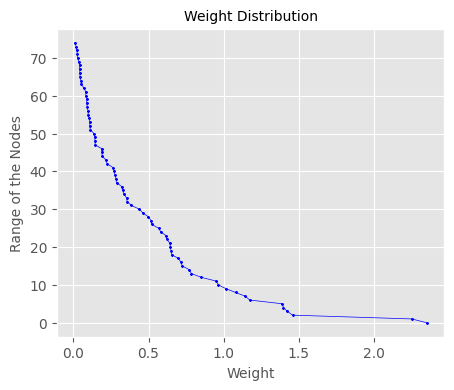

In [32]:
weights=(np.random.pareto(3, V))
weights=list(weights)
print("the weights are:",weights)
W=sum(weights)
print("the total weight is:", W)

sorted_weights=sorted(weights)
x_range = range(len(sorted_weights))
plt.figure(figsize=(5,4))
plt.plot(sorted(weights,reverse=True),x_range,marker='*', linestyle='-', color='b', markersize=1.5, linewidth='0.5')
plt.xlabel('Weight', fontsize=10)
plt.ylabel('Range of the Nodes', fontsize=10)
plt.title("Weight Distribution", fontsize=10)
plt.grid(True)

The quantiles to be found are : [0.0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 1.0]
the quantile values are: [0.007082337016340201, 0.07407863560574529, 0.14020974226191468, 0.2884373559320268, 0.5716000808868303, 0.8289116779918383, 2.352743839859239]


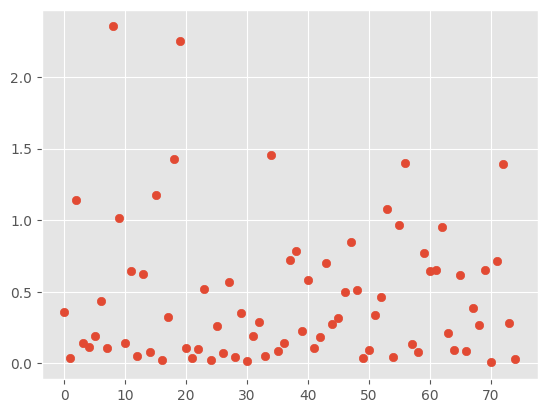

In [33]:
# Dividing it into N equal parts, if N = 3
# then need to find 0, 33, 66, 100 - quantiles
# find the quantiles values from sorted a - that becomes your weight layer check and then assign them
plt.scatter(x_range,weights)

N=int(math.log2(V))
quantiles = np.linspace(0, 1, N + 1)
print("The quantiles to be found are :",list(quantiles))

quantile_values = np.quantile(sorted_weights, quantiles)
print("the quantile values are:",list(quantile_values))

In [34]:
weight_layers = [[] for _ in range(N)]
for k, weight in enumerate(weights):
    for i in range(N):
        if i < N - 1:
            if quantile_values[i] <= weight < quantile_values[i + 1]:
                weight_layers[i].append(k)
                break
        else:
            if quantile_values[i] <= weight:
                weight_layers[i].append(k)
                break
for i, layer in enumerate(weight_layers):
    print(f" Weight Layer {i+1}: {layer}")
    print(f"Total Number of nodes in WL{i + 1} is: ", len(layer))

 Weight Layer 1: [1, 12, 16, 21, 24, 26, 28, 30, 33, 49, 54, 70, 74]
Total Number of nodes in WL1 is:  13
 Weight Layer 2: [4, 7, 14, 20, 22, 35, 41, 50, 57, 58, 64, 66]
Total Number of nodes in WL2 is:  12
 Weight Layer 3: [3, 5, 10, 25, 31, 36, 39, 42, 44, 63, 68, 73]
Total Number of nodes in WL3 is:  12
 Weight Layer 4: [0, 6, 17, 23, 27, 29, 32, 45, 46, 48, 51, 52, 67]
Total Number of nodes in WL4 is:  13
 Weight Layer 5: [11, 13, 37, 38, 40, 43, 59, 60, 61, 65, 69, 71]
Total Number of nodes in WL5 is:  12
 Weight Layer 6: [2, 8, 9, 15, 18, 19, 34, 47, 53, 55, 56, 62, 72]
Total Number of nodes in WL6 is:  13


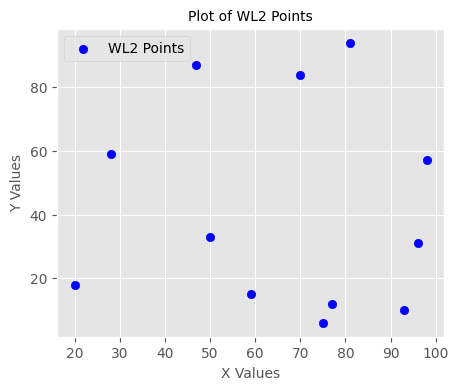

In [35]:
indices = weight_layers[1]

x_plot = [x[idx] for idx in indices]
y_plot = [y[idx] for idx in indices]

plt.figure(figsize=(5,4))
plt.scatter(x_plot, y_plot, marker='o', color='b', label='WL2 Points')

plt.xlabel('X Values', fontsize=10)
plt.ylabel('Y Values', fontsize=10)
plt.title('Plot of WL2 Points', fontsize=10)
plt.grid(True)
plt.legend()
plt.show()


In [36]:
def find_connections(i, j, x_values, y_values):
    return [[x_values[i],y_values[i]],[x_values[j], y_values[j]]]

In [37]:
def get_box_index(x, y, box_size):
    return [x//box_size, y//box_size]

In [38]:
def create_spatial_boxes(nodes, box_size):
    print("The nodes are:", nodes)
    print("The box size is:",box_size)
    boxes = {}
    for i in nodes:
        box_index = get_box_index(x[i], y[i], box_size)
        final_box_index = (box_index[0] * box_size, box_index[1] * box_size)
        if final_box_index not in boxes:
            boxes[final_box_index] = {"box_size": box_size, "nodes": []}
        boxes[final_box_index]["nodes"].append(i)
        print("Spatial :",boxes)
        print("\n")
    return boxes

In [39]:
box_sizes = [Max1 // (2 ** i) for i in range(N)]
boxes = [create_spatial_boxes(weight_layers[(N-1)-i], box_sizes[i]) for i in range(N)]
print("Final Boxes",boxes)

The nodes are: [2, 8, 9, 15, 18, 19, 34, 47, 53, 55, 56, 62, 72]
The box size is: 100
Spatial : {(0, 0): {'box_size': 100, 'nodes': [2]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18, 19]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18, 19, 34]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18, 19, 34]}, (100, 0): {'box_size': 100, 'nodes': [47]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18, 19, 34, 53]}, (100, 0): {'box_size': 100, 'nodes': [47]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18, 19, 34, 53, 55]}, (100, 0): {'box_size': 100, 'nodes': [47]}}


Spatial : {(0, 0): {'box_size': 100, 'nodes': [2, 8, 9, 15, 18, 19, 34, 53, 55, 56]}, (100,

In [40]:
def distance_between_2(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [41]:
def geom_dist(p):
    if p < 1e-10:
        return math.log(random.random()) / -p
    else:
        return math.log(random.random()) / math.log(1 - p)


In [42]:
def is_point_in_box(x, y, box):
    x_min = min(p[0] for p in box)
    x_max = max(p[0] for p in box)
    y_min = min(p[1] for p in box)
    y_max = max(p[1] for p in box)
    return x_min <= x <= x_max and y_min <= y <= y_max

In [43]:
def small_d(box_A_index,box_A_size,box_B_index,box_B_size):
    box_A_index=list(box_A_index)
    box_B_index=list(box_B_index)
    # All the edge points of box A are , if size is 100 - (0,0),(0,100),(100,100),(100,0)
    box_A_corners = [
        (box_A_index[0], box_A_index[1]),
        (box_A_index[0], box_A_index[1] + box_A_size),
        (box_A_index[0] + box_A_size, box_A_index[1] + box_A_size),
        (box_A_index[0] + box_A_size, box_A_index[1])
    ]
    print("Box A Corners :", box_A_corners)
    # All the edge points of box b are, if the size is 50 - (0,50),(0,100),(50,100),(50,50)
    box_B_corners = [
        (box_B_index[0], box_B_index[1]),
        (box_B_index[0], box_B_index[1] + box_B_size),
        (box_B_index[0] + box_B_size, box_B_index[1] + box_B_size),
        (box_B_index[0] + box_B_size, box_B_index[1])
    ]
    print("Box B Corners :", box_B_corners)
    distances = []
    for a in box_A_corners:
        for b in box_B_corners:
            distance = ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5
            distances.append((distance, a, b))
    min_distance = min(distances, key=lambda x: x[0])
    print(" Minimum distance is between the points:", min_distance[1], "and", min_distance[2])
    return min_distance

In [44]:
def check_type1(box_A_index,box_A_size,box_B_index,box_B_size):
    box_A_index=list(box_A_index)
    box_A_corners = [
        (box_A_index[0], box_A_index[1]),
        (box_A_index[0], box_A_index[1] + box_A_size),
        (box_A_index[0] + box_A_size, box_A_index[1] + box_A_size),
        (box_A_index[0] + box_A_size, box_A_index[1])
    ]
    box_B_corners = [
        (box_B_index[0], box_B_index[1]),
        (box_B_index[0], box_B_index[1] + box_B_size),
        (box_B_index[0] + box_B_size, box_B_index[1] + box_B_size),
        (box_B_index[0] + box_B_size, box_B_index[1])
    ]
    d=small_d(box_A_index,box_A_size,box_B_index,box_B_size)
    a=d[1]
    b=d[2]
    new_point = [a_i - b_i for a_i, b_i in zip(a, b)]
    #print("New point for comparison :",new_point)
    if box_A_size>=box_B_size:
        result = is_point_in_box(new_point[0], new_point[1], box_A_corners)
    else:
        result = is_point_in_box(new_point[0], new_point[1], box_B_corners)
    print(f"The point ({new_point[0]}, {new_point[1]}) lies within the box: {result}")
    return result


In [45]:
E1 = set()
E2 = set()

In [46]:
for i in range(N):
    for j in range(i, N):
        pairs_type_I = []
        pairs_type_II = []
        for box_A_index, box_A_data in boxes[i].items():
            for box_B_index, box_B_data in boxes[j].items():
                box_A_nodes = box_A_data['nodes']
                box_A_size = box_A_data['box_size']
                box_B_nodes = box_B_data['nodes']
                box_B_size = box_B_data['box_size']
                print("Box A index",box_A_index)
                print("Box B index", box_B_index)
                print("Nodes of A are", box_A_nodes)
                print("Nodes of B are",box_B_nodes)
                print("Box A size", box_A_size)
                print("Box B size", box_B_size)
                if box_A_index == box_B_index or check_type1(box_A_index,box_A_size,box_B_index,box_B_size):
                    pairs_type_I.append((box_A_nodes, box_B_nodes))
                    print("Updated Pairs type 1 :",pairs_type_I)
                    print("\n")
                else:
                    pairs_type_II.append((box_A_nodes, box_B_nodes))
                    print("Updated Pairs type 2 :",pairs_type_II)
                    print("\n")

                for (A, B) in pairs_type_I:
                    for u in A:
                        for v in B:
                            print("u :",u)
                            print("v :",v)
                            if u!=v:
                                p_uv=(weights[u]* weights[v])/W
                                sample_random=random.random()
                                print(" p_uv : ",p_uv)
                                print( "sample_random :",sample_random)
                                print("\n")
                                if sample_random<p_uv:
                                    E1.add((u,v))
                                    print("Edge 1 has been added for this")
                print("\n")
                for (A, B) in pairs_type_II:
                    #determing the smallest distance
                    d = small_d(box_A_index, box_A_size, box_B_index, box_B_size)
                    print("The min distance between the two boxes is :",d[0])
                    #Determining the largest weights in both the boxes
                    w1 = max(weights[u] for u in A)
                    w2 = max(weights[v] for v in B)
                    print("Max weigh in A :",w1)
                    print("Max weight in B :",w2)
                    #Calculating the maximum proabability
                    if d[0]==0:
                        p_bar=0.01# if 0 then log(1-p)-> 0
                    else:
                        p_bar = min(c * (1/d[0])**(alpha*dim) * (w1*w2/W)**alpha, 0.98)
                    print("The proability of there being a connection is :",p_bar)

                    r = geom_dist(p_bar)

                    print("The geom_dist is given by :",r)
                    #While loop
                    while r < len(A) * len(B):
                        # Get the r-th pair of vertices
                        u = A[int((r-1) % len(A))]
                        v = B[int((r-1) // len(A))]
                        print("rth pair u is:",u)
                        print("rth pair v is:",v)
                        dis = distance_between_2(x[u], y[u], x[v], y[v])
                        p_uv = min(c * (1/dis)**(alpha*dim) * (weights[u]*weights[v]/W)**alpha, 0.99)
                        print("The distance between the 2 :",dis)

                        print("the true probaility :",p_uv)
                        if random.random() < p_uv / p_bar:
                            E2.add((u, v))
                            print("Edge 2 has been added for this")
                        r=r+geom_dist(p_bar)


Streaming output truncated to the last 5000 lines.
The geom_dist is given by : 18114907708643.074
Box A Corners : [(24, 75), (24, 78), (27, 78), (27, 75)]
Box B Corners : [(48, 75), (48, 78), (51, 78), (51, 75)]
 Minimum distance is between the points: (27, 78) and (48, 78)
The min distance between the two boxes is : 21.0
Max weigh in A : 0.05250035481259929
Max weight in B : 0.0348894890712117
The proability of there being a connection is : 6.976886002600209e-14
The geom_dist is given by : 6959280758440.867
Box A Corners : [(24, 75), (24, 78), (27, 78), (27, 75)]
Box B Corners : [(48, 75), (48, 78), (51, 78), (51, 75)]
 Minimum distance is between the points: (27, 78) and (48, 78)
The min distance between the two boxes is : 21.0
Max weigh in A : 0.05250035481259929
Max weight in B : 0.021824674399645527
The proability of there being a connection is : 2.730033361481156e-14
The geom_dist is given by : 15968433607814.973
Box A Corners : [(24, 75), (24, 78), (27, 78), (27, 75)]
Box B Corn

In [47]:
print("E1 :", E1)
print("E2 :", E2)

E1 : {(53, 14), (19, 46), (34, 19), (56, 19), (8, 9), (9, 8), (2, 57), (32, 67), (37, 42), (15, 5), (8, 48), (8, 2), (8, 11), (9, 19), (18, 3), (53, 18), (55, 36), (72, 52), (13, 67), (72, 6), (15, 18), (34, 53), (62, 69), (8, 43), (18, 23), (8, 52), (9, 51), (19, 61), (19, 6), (9, 69), (38, 59), (55, 38), (53, 13), (65, 51), (18, 55), (65, 17), (53, 61), (53, 6), (19, 56), (11, 61), (15, 43), (19, 13), (8, 13), (62, 11), (53, 8), (8, 40), (56, 59), (65, 37), (17, 27), (2, 72), (56, 52), (62, 13), (38, 13), (56, 61), (34, 6), (56, 6), (13, 32), (8, 72), (18, 52), (55, 46), (2, 19), (9, 43), (72, 19), (9, 52), (8, 19), (34, 56), (9, 36), (13, 27), (55, 23), (8, 3), (62, 38), (37, 27), (18, 56), (34, 40), (2, 5), (72, 69), (59, 60), (38, 37), (61, 11), (55, 34), (8, 23), (18, 6), (15, 19), (72, 71), (34, 8), (56, 8), (2, 46), (8, 71), (37, 40), (38, 5), (61, 43)}
E2 : set()


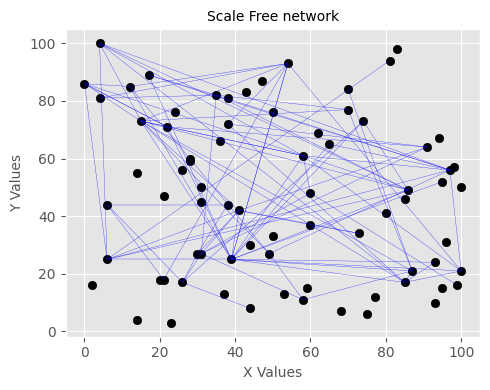

In [48]:
plt.figure(figsize=(5, 4))
plt.scatter(x, y, color='black')
for (u, v) in E1:
    start, end = find_connections(u, v, x, y)
    x_values1 = [start[0], end[0]]
    y_values1 = [start[1], end[1]]
    plt.plot(x_values1, y_values1, color='blue', linestyle='solid', linewidth ="0.2")
for (u, v) in E2:
    start, end = find_connections(u, v, x, y)
    x_values1 = [start[0], end[0]]
    y_values1 = [start[1], end[1]]
    plt.plot(x_values1, y_values1, color='red', linestyle='solid', linewidth ="2")
plt.xlabel('X Values', fontsize=10)
plt.ylabel('Y Values', fontsize=10)
plt.title("Scale Free network", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


5 nodes have 1 edges each.
7 nodes have 2 edges each.
9 nodes have 3 edges each.
3 nodes have 4 edges each.
3 nodes have 5 edges each.
4 nodes have 6 edges each.
4 nodes have 7 edges each.
3 nodes have 8 edges each.
1 nodes have 11 edges each.
1 nodes have 16 edges each.
32 nodes have 0 edges each.


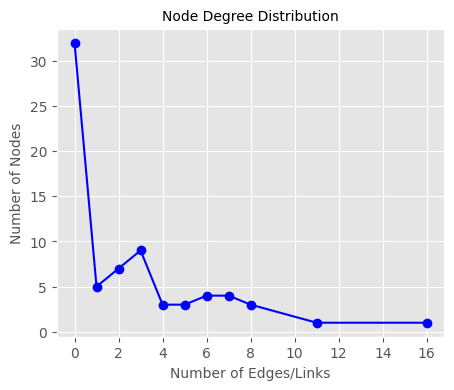

In [49]:
connections = E1.union(E2)
G = nx.Graph(connections)
node_degrees = G.degree()

degree_counts = {}
for node, degree in node_degrees:
    if degree not in degree_counts:
        degree_counts[degree] = 1
    else:
        degree_counts[degree] += 1
sorted_degree_counts = dict(sorted(degree_counts.items()))

V = max(G.nodes)
sum1 = sum(sorted_degree_counts.values())

if sum1 != V:
    zero_degree_count = V - sum1
    sorted_degree_counts[0] = zero_degree_count

for degree, count in sorted_degree_counts.items():
    print(f"{count} nodes have {degree} edges each.")

degrees = list(sorted(sorted_degree_counts.keys()))  # Ensure sorting starts from 0
counts = [sorted_degree_counts[degree] for degree in degrees]
plt.figure(figsize=(5, 4))
plt.plot(degrees, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Edges/Links', fontsize=10)
plt.ylabel('Number of Nodes', fontsize=10)
plt.title("Node Degree Distribution", fontsize=10)
plt.grid(True)
plt.show()
